#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Load Dataset

In [2]:
# Read CSV
df = pd.read_csv('https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [3]:
df.duplicated().any()

True

In [4]:
df.drop_duplicates(inplace=True)

Periksa apakah ada missing values

In [5]:
df.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

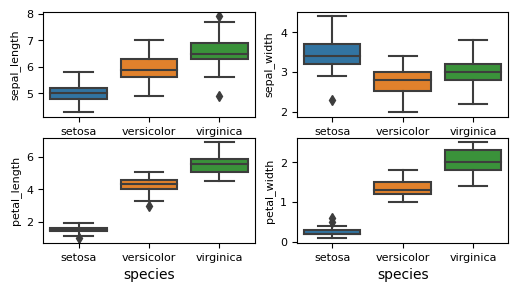

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(6,3))
sns.boxplot(data=df, y='sepal_length', x='species', ax=axes[0,0])
axes[0,0].set_ylabel('sepal_length', fontsize=8)

sns.boxplot(data=df, y='sepal_width', x='species', ax=axes[0,1])
axes[0,1].set_ylabel('sepal_width', fontsize=8)

sns.boxplot(data=df, y='petal_length', x='species', ax=axes[1,0])
axes[1,0].set_ylabel('petal_length', fontsize=8)

sns.boxplot(data=df, y='petal_width', x='species', ax=axes[1,1])
axes[1,1].set_ylabel('petal_width', fontsize=8)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=8)
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [9]:
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [10]:
model = LogisticRegression(random_state=0).fit(x_train_scaled, y_train)
model

D:\File\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

Uji model dengan dataset test

In [11]:
y_pred = model.predict(x_test_scaled)
print(y_pred)

['virginica' 'versicolor' 'versicolor' 'virginica' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa' 'setosa'
 'versicolor' 'setosa' 'versicolor']


In [12]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')

Confusion Matrix:
 [[4 0 0]
 [0 7 1]
 [0 0 3]]
Accuracy Score: 0.9333333333333333


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [13]:
model = GaussianNB().fit(x_train_scaled, y_train)
model

D:\File\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

Uji hasil model dengan data test

In [14]:
y_pred = model.predict(x_test_scaled)
print(y_pred)

['virginica' 'versicolor' 'versicolor' 'virginica' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa' 'setosa'
 'versicolor' 'setosa' 'versicolor']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [15]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')

Confusion Matrix:
 [[4 0 0]
 [0 7 1]
 [0 0 3]]
Accuracy Score: 0.9333333333333333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [16]:
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean').fit(x_train_scaled, y_train)
model

D:\File\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [17]:
y_pred = model.predict(x_test_scaled)
print(y_pred)

['virginica' 'versicolor' 'versicolor' 'virginica' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa' 'setosa'
 'versicolor' 'setosa' 'versicolor']


D:\File\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Ukur akurasi dari model K-Nearest Neighbor

In [18]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')

Confusion Matrix:
 [[4 0 0]
 [0 7 1]
 [0 0 3]]
Accuracy Score: 0.9333333333333333


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

Dengan Train Test Split menggunakan random_state = 0 dan dengan menghapus duplicate, ketiga metode tersebut menghasilkan tingkat akurasi yang sama yaitu 93.99%